In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")

In [3]:
dataset.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [6]:
dataset.drop(['CustomerID'],inplace=True,axis=1)

In [7]:
dataset.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6


In [9]:
dataset.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [19]:
dataset.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le=LabelEncoder()

In [22]:
le.fit(dataset['Gender'])

LabelEncoder()

In [23]:
dataset['Gender']=le.transform(dataset['Gender'])

In [24]:
dataset.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6


In [25]:
le.classes_

array(['Female', 'Male'], dtype=object)

In [27]:
mapping = dict(zip(le.classes_,range(len(le.classes_))))
mapping

{'Female': 0, 'Male': 1}

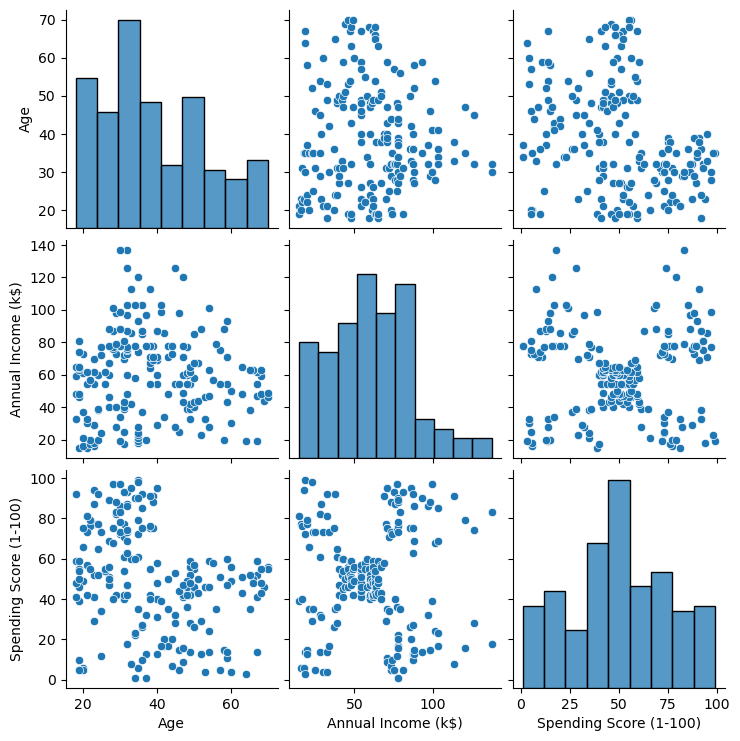

In [30]:
sns.pairplot(dataset[['Age','Annual Income (k$)','Spending Score (1-100)']])
plt.show()

In [31]:
dataset[['Age','Annual Income (k$)','Spending Score (1-100)']].corr()*100

,Age,Annual Income (k$),Spending Score (1-100)
Age,100.000000,-1.239804,-32.722685
Annual Income (k$),-1.239804,100.000000,0.990285
Spending Score (1-100),-32.722685,0.990285,100.000000


In [32]:
x = dataset[['Annual Income (k$)','Spending Score (1-100)']]

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
ss=StandardScaler()

In [35]:
ss.fit(x)

StandardScaler()

In [36]:
x_scaled=ss.transform(x)
new_dataset=pd.DataFrame({'Annual Income (k$)' : x_scaled[:,0],'Spending Score (1-100)' : x_scaled[:,1]})
new_dataset.head(3)

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913


In [37]:
new_dataset.corr()*100

,Annual Income (k$),Spending Score (1-100)
Annual Income (k$),100.000000,0.990285
Spending Score (1-100),0.990285,100.000000


In [39]:
from sklearn.cluster import KMeans

In [42]:
wcss = []
for i in range (2,21):
    km=KMeans(n_clusters=i,init='k-means++')
    km.fit(new_dataset)
    wcss.append(km.inertia_)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

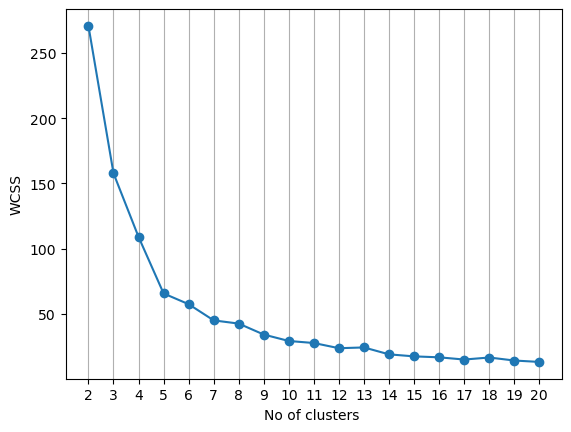

In [45]:
plt.plot(list(range(2,21)),wcss,marker = 'o')
plt.xlabel("No of clusters ")
plt.ylabel("WCSS")
plt.xticks(list(range(2,21)))
plt.grid(axis= 'x')
plt.show()

In [46]:
from sklearn.metrics import silhouette_score

In [56]:

for i in range(2,21):
    km=KMeans(n_clusters=i , init='k-means++')
    km.fit(new_dataset)
    print(i,silhouette_score(new_dataset,labels=km.labels_)*100)
    

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

2 38.596922271780954
3 46.65847441900014
4 49.434988482196786
5 55.394237994342056
6 45.67291383722191
7 53.09807277201237
8 45.81480299278478
9 44.763547894001135
10 41.86111814855954
11 41.47733824327335
12 41.66427083675909
13 45.18631473400541
14 39.52039561769081
15 43.0485502551784
16 40.997902401562854
17 35.98332267612185
18 40.878607486136374
19 40.76928593899784
20 37.46944233031283


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

In [57]:
km = KMeans(n_clusters=5,init='k-means++',random_state=42)
new_dataset['Predicted Categories'] = km.fit_predict(new_dataset) 

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [58]:
new_dataset.head(5)

,Annual Income (k$),Spending Score (1-100),Predicted Categories
0,-1.738999,-0.434801,4
1,-1.738999,1.195704,2
2,-1.700830,-1.715913,4
3,-1.700830,1.040418,2
4,-1.662660,-0.395980,4


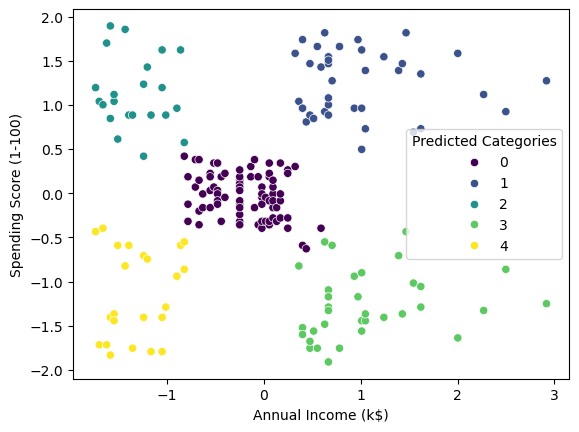

In [59]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue = 'Predicted Categories',data = new_dataset,palette='viridis')
plt.show()

In [60]:
dataset['Categories'] = new_dataset['Predicted Categories']

In [62]:
print(dataset.groupby('Categories')[['Annual Income (k$)','Spending Score (1-100)']].mean())

            Annual Income (k$)  Spending Score (1-100)
Categories                                            
0                    55.296296               49.518519
1                    86.538462               82.128205
2                    25.727273               79.363636
3                    88.200000               17.114286
4                    26.304348               20.913043


In [63]:
dataset[['Annual Income (k$)','Spending Score (1-100)']].describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


Conclusion & Business Insights The K-Means clustering model segmented customers into 5 distinct groups based on Annual Income and Spending Score:

Cluster Average Income Average Spending Score Segment Name Business Interpretation 0 62.57 53.96 Moderate Income – Moderate Spending Balanced customers with average income and spending. Stable group, may respond to seasonal promotions.

1 88.20 17.11 High Income – Very Low Spending Wealthy customers who spend very little. Potential untapped revenue — need targeted offers or premium experiences to encourage spending.

2 26.304 20.913 Very Low Income – Very Low Spending Price-sensitive customers with low purchasing power. Focus on low-cost products, discounts, or budget-friendly bundles.

3 86.53.0 81.89 High Income – High Spending Most valuable customers. Should be retained with loyalty programs, exclusive offers, and personalized service.

4 25.72 79.36 Very Low Income – High Spending Low income but high spending behavior. Could be impulsive buyers — can be engaged with frequent small promotions or bundle offers.